In [3]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import re
batch_size = 32
epochs = 5

# input image dimensions
img_rows, img_cols = 110, 200



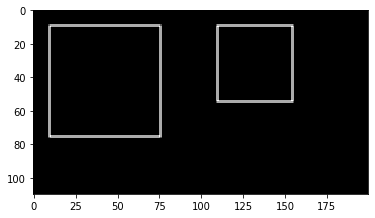

0


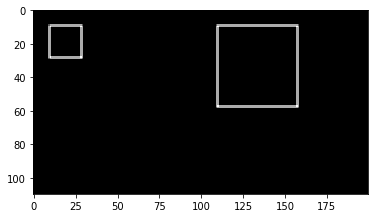

1


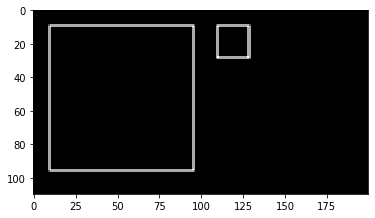

2
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import csv
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import rotate
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
import pandas as pd




trainxs = []
trainys = []

DATADIR = r"C:\Users\colly\Desktop\All Experiment Images\Size 3\Line"

CATEGORIES = ["Correct", "Over", "Under"]

#i = [1,1,2,2,3,3]
#x =0
'''
for category in CATEGORIES:
    path = os.path.join(DATADIR,category) 
    
    class_num = CATEGORIES.index(category)
    #class_num = i[x]
    #x +=1
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = cv2.bitwise_not(img_array)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        print(class_num)
          # we just want one for now so break
        break
'''

for x,category in enumerate(CATEGORIES):  
    path = os.path.join(DATADIR,category)  
    class_num = CATEGORIES.index(category)
    #class_num = i[x]
    #print(class_num)
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = cv2.bitwise_not(img_array)
        #img_array = cv2.resize(img_array, (100,100))
        trainys.append(class_num)
        trainxs.append(img_array)
    plt.imshow(img_array, cmap='gray')  # graph it
    plt.show()  # display!
    print(class_num)
trainxs1 = np.asarray(trainxs, dtype=np.float32)
trainys1 = np.asarray(trainys, dtype=np.int)
print(trainys)

            



In [6]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
np.set_printoptions(threshold=np.inf)




x_train, x_test, y_train_old, y_test_old = train_test_split(trainxs1, trainys1, test_size=0.2, random_state=42)
y_train = to_categorical(y_train_old)
y_test = to_categorical(y_test_old)
#print(y_train)
#plt.imshow(x_test[99], cmap='gray')
#print(y_test[99])

In [7]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train.shape

(2400, 110, 200, 1)

In [8]:
print('x_train shape:', x_train.shape)
x_train = np.array(x_train)
x_test = np.array(x_test)

#print(x_train[3])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

x_train shape: (2400, 110, 200, 1)
y_train shape: (2400, 3)
2400 train samples
600 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 108, 198, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 196, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 98, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 53, 98, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 332416)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               42549376  
________________________

In [9]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - ETA: 6:28 - loss: 1.1021 - accuracy: 0.31 - ETA: 5:02 - loss: 0.9079 - accuracy: 0.51 - ETA: 4:31 - loss: 0.8795 - accuracy: 0.51 - ETA: 4:13 - loss: 0.8807 - accuracy: 0.56 - ETA: 4:01 - loss: 0.8286 - accuracy: 0.60 - ETA: 3:55 - loss: 0.7453 - accuracy: 0.65 - ETA: 3:53 - loss: 0.6930 - accuracy: 0.67 - ETA: 3:51 - loss: 0.6560 - accuracy: 0.69 - ETA: 3:44 - loss: 0.6230 - accuracy: 0.71 - ETA: 3:39 - loss: 0.6036 - accuracy: 0.72 - ETA: 3:33 - loss: 0.5843 - accuracy: 0.73 - ETA: 3:28 - loss: 0.5611 - accuracy: 0.74 - ETA: 3:23 - loss: 0.5359 - accuracy: 0.75 - ETA: 3:19 - loss: 0.5270 - accuracy: 0.76 - ETA: 3:14 - loss: 0.5115 - accuracy: 0.77 - ETA: 3:10 - loss: 0.4992 - accuracy: 0.78 - ETA: 3:06 - loss: 0.4945 - accuracy: 0.78 - ETA: 3:02 - loss: 0.4887 - accuracy: 0.78 - ETA: 2:58 - loss: 0.4823 - accuracy: 0.79 - ETA: 2:54 - loss: 0.4718 - accuracy: 0.80 - ETA: 2:50 - loss: 

2400/2400 [==============================] - ETA: 4:36 - loss: 0.0686 - accuracy: 0.96 - ETA: 4:30 - loss: 0.1049 - accuracy: 0.95 - ETA: 4:23 - loss: 0.0866 - accuracy: 0.96 - ETA: 4:20 - loss: 0.1016 - accuracy: 0.96 - ETA: 4:22 - loss: 0.0930 - accuracy: 0.96 - ETA: 4:22 - loss: 0.0950 - accuracy: 0.96 - ETA: 4:16 - loss: 0.0930 - accuracy: 0.96 - ETA: 4:09 - loss: 0.0940 - accuracy: 0.96 - ETA: 4:03 - loss: 0.0895 - accuracy: 0.96 - ETA: 3:58 - loss: 0.1005 - accuracy: 0.96 - ETA: 3:53 - loss: 0.0996 - accuracy: 0.96 - ETA: 3:48 - loss: 0.0934 - accuracy: 0.96 - ETA: 3:46 - loss: 0.0885 - accuracy: 0.96 - ETA: 3:44 - loss: 0.0880 - accuracy: 0.96 - ETA: 3:40 - loss: 0.0879 - accuracy: 0.96 - ETA: 3:36 - loss: 0.0851 - accuracy: 0.96 - ETA: 3:32 - loss: 0.0824 - accuracy: 0.96 - ETA: 3:28 - loss: 0.0833 - accuracy: 0.96 - ETA: 3:24 - loss: 0.0843 - accuracy: 0.96 - ETA: 3:20 - loss: 0.0818 - accuracy: 0.96 - ETA: 3:17 - loss: 0.0859 - accuracy: 0.96 - ETA: 3:13 - loss: 0.0828 - accu

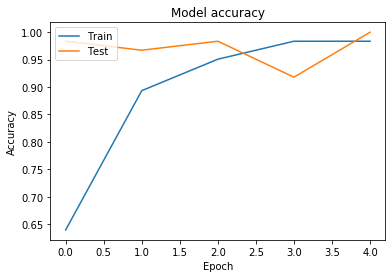

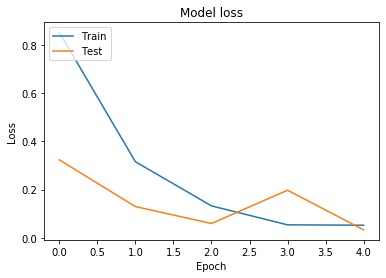

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
trainxs = []
trainys = []

DATADIR = r"C:\Users\colly\Desktop\All Experiment Images\Size 3\Line"

CATEGORIES = ["Correct", "Over", "Under"]


for x,category in enumerate(CATEGORIES):  
    path = os.path.join(DATADIR,category)  
    class_num = CATEGORIES.index(category)
    #class_num = i[x]
    #print(class_num)
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        img_array = cv2.bitwise_not(img_array)
        img_array = cv2.resize(img_array, (100,100)).flatten()
        trainys.append(class_num)
        trainxs.append(img_array)
        
x_train, x_test, y_train_old, y_test_old = train_test_split(trainxs, trainys, test_size=0.2, random_state=42)

In [11]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#print(x_train)
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=8)
#Train the algorithm
neigh.fit(x_train, y_train_old)
# predict the response
pred = neigh.predict(x_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test_old, pred))

KNeighbors accuracy score :  0.7966666666666666


In [12]:
# import the necessary packages

from sklearn.svm import SVC


svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train, y_train_old) 
svm_predictions = svm_model_linear.predict(x_test) 

  
# creating a confusion matrix 
#cm = confusion_matrix(y_test_old, svm_predictions) 
print ("svm accuracy score : ", svm_model_linear.score(x_test, y_test_old) )

svm accuracy score :  0.9883333333333333


In [13]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 


dtree_model = DecisionTreeClassifier(max_depth = 100).fit(x_train, y_train_old) 

pred = dtree_model.predict(x_test) 

print ("Decision Tree accuracy score : ",accuracy_score(y_test_old, pred))

Decision Tree accuracy score :  0.9816666666666667


In [114]:
print("Hello world")

Hello world


In [110]:
pred = model.predict_classes(x_test)

In [ ]:
print(pred[0])

In [111]:
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(y_test_old,pred)
print(cm)

[[580   0   0   0   0   0]
 [ 19 575   0   8  12   0]
 [  0  20 334   0  18   0]
 [  8   1   0 628   0   8]
 [  0   4   0   0 385   2]
 [  0   0   0   1   0 577]]


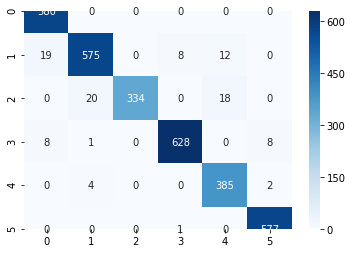

In [112]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(cm,annot=True,cmap='Blues', fmt='g')

In [53]:
y_test.shape

(3180, 6)

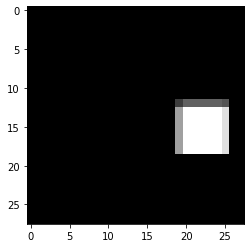

[1. 0. 0. 0. 0. 0.]
1


In [91]:
i=100

plt.imshow(test_x1[i], cmap='gray')
plt.show()
print(y_test[i])
print(pred[i] + 1)

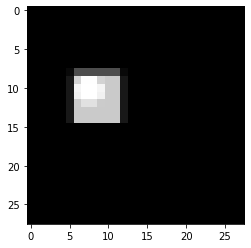

predicted:  1
actual:  4


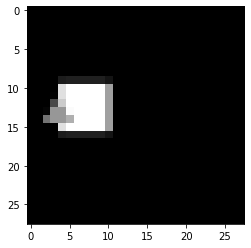

predicted:  4
actual:  2


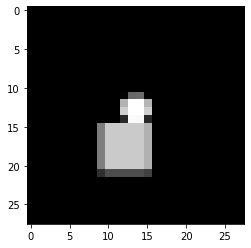

predicted:  5
actual:  2


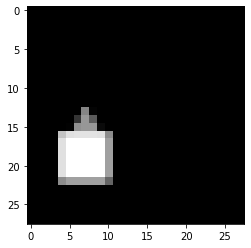

predicted:  6
actual:  4


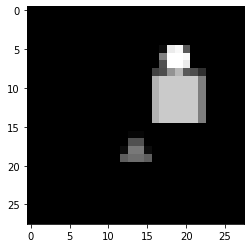

predicted:  5
actual:  3


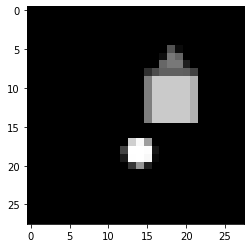

predicted:  5
actual:  3


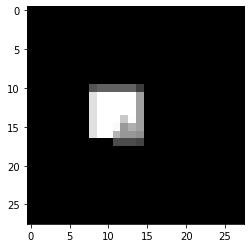

predicted:  1
actual:  2


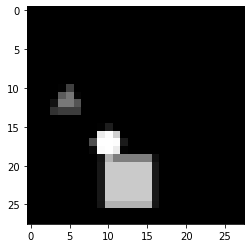

predicted:  5
actual:  3


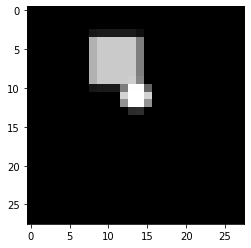

predicted:  5
actual:  2


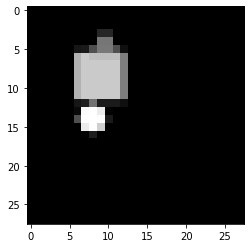

predicted:  6
actual:  5


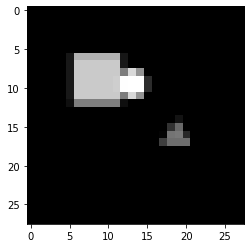

predicted:  2
actual:  3


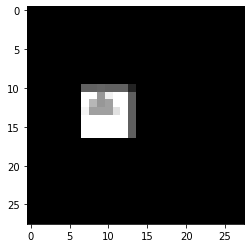

predicted:  1
actual:  2


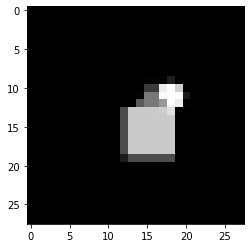

predicted:  2
actual:  5


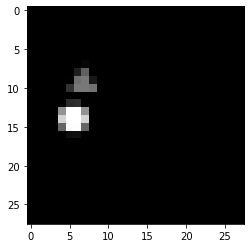

predicted:  2
actual:  4


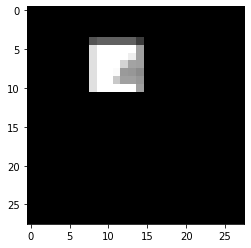

predicted:  1
actual:  2


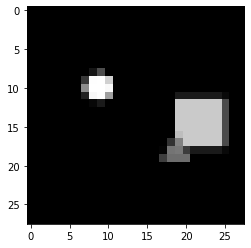

predicted:  2
actual:  3


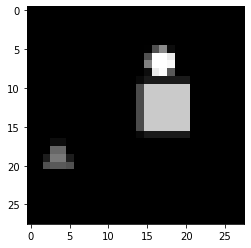

predicted:  5
actual:  3


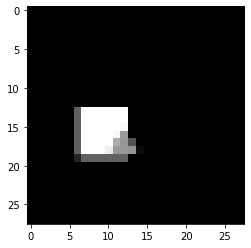

predicted:  1
actual:  2


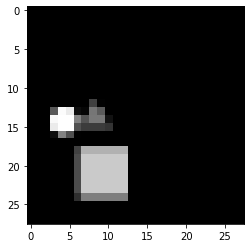

predicted:  2
actual:  3


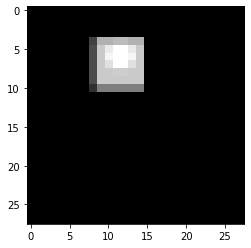

predicted:  1
actual:  4


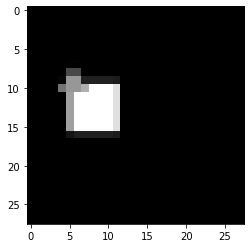

predicted:  4
actual:  2


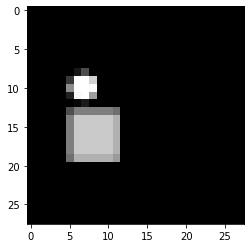

predicted:  5
actual:  2


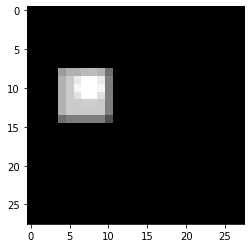

predicted:  1
actual:  4


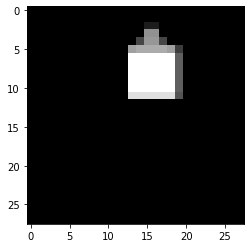

predicted:  6
actual:  4


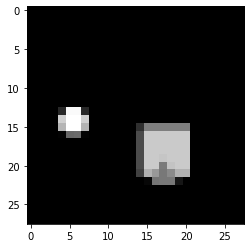

predicted:  2
actual:  3


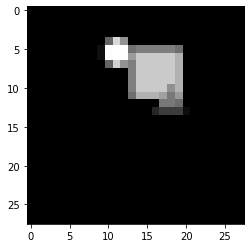

predicted:  2
actual:  3


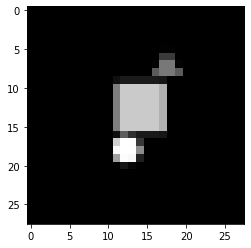

predicted:  5
actual:  3


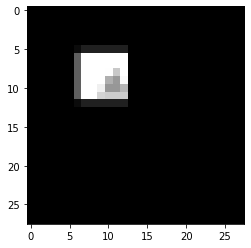

predicted:  1
actual:  2


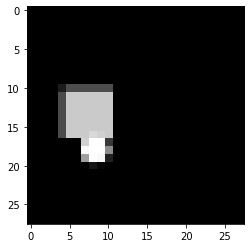

predicted:  5
actual:  2


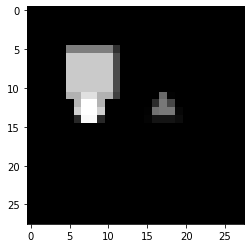

predicted:  5
actual:  3


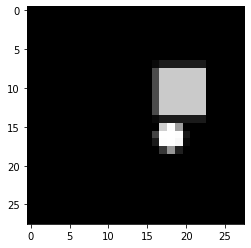

predicted:  5
actual:  2


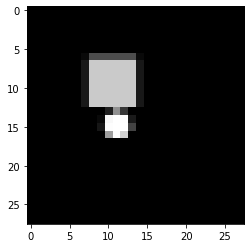

predicted:  5
actual:  2


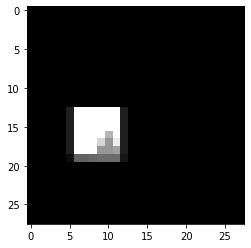

predicted:  1
actual:  2


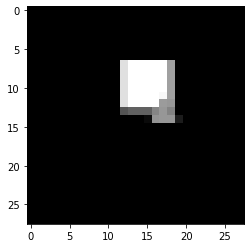

predicted:  1
actual:  2


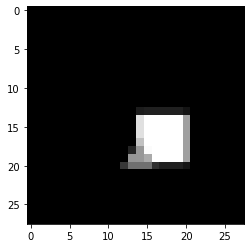

predicted:  1
actual:  2


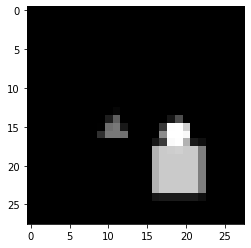

predicted:  5
actual:  3


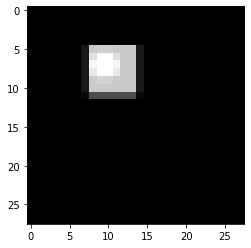

predicted:  1
actual:  4


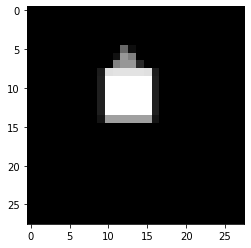

predicted:  6
actual:  4


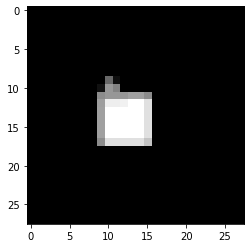

predicted:  4
actual:  2


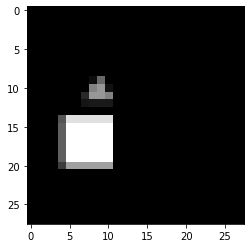

predicted:  4
actual:  2


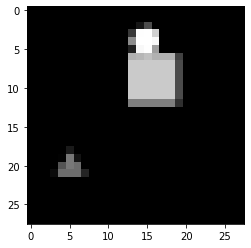

predicted:  5
actual:  3


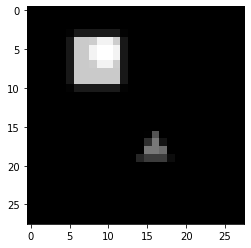

predicted:  2
actual:  5


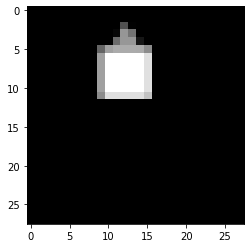

predicted:  6
actual:  4


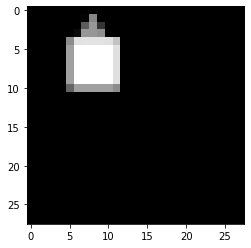

predicted:  6
actual:  4


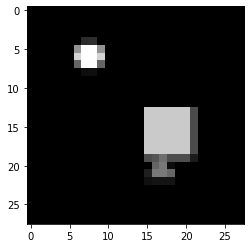

predicted:  2
actual:  3


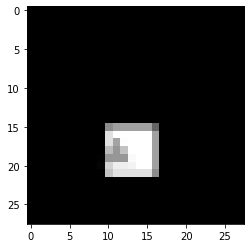

predicted:  1
actual:  2


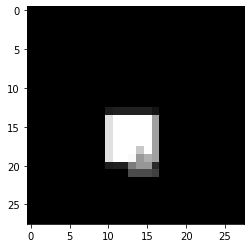

predicted:  4
actual:  2


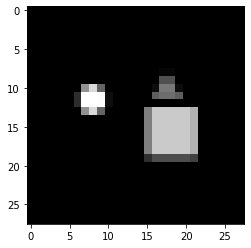

predicted:  5
actual:  3


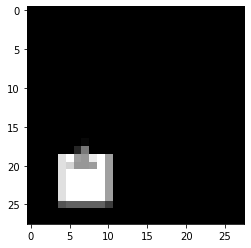

predicted:  1
actual:  2


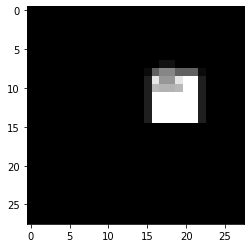

predicted:  4
actual:  2


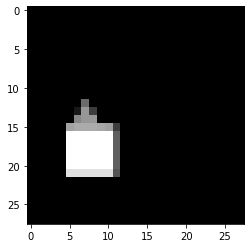

predicted:  6
actual:  4


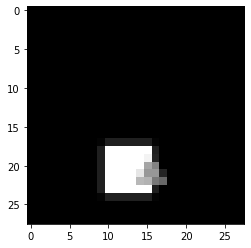

predicted:  1
actual:  2


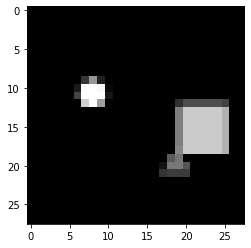

predicted:  2
actual:  3


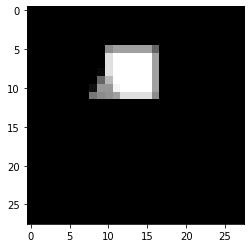

predicted:  1
actual:  2


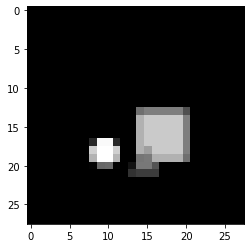

predicted:  2
actual:  3


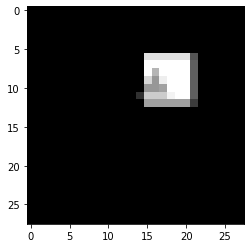

predicted:  1
actual:  2


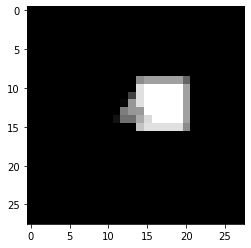

predicted:  4
actual:  2


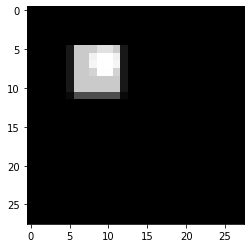

predicted:  1
actual:  4


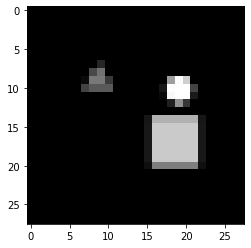

predicted:  5
actual:  3


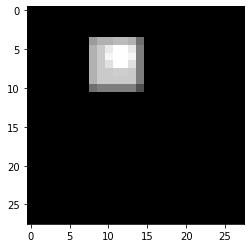

predicted:  1
actual:  4


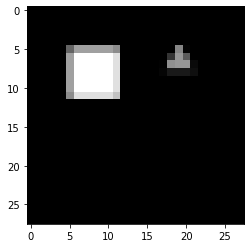

predicted:  5
actual:  2


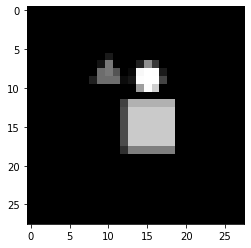

predicted:  5
actual:  3


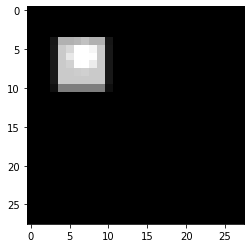

predicted:  1
actual:  4


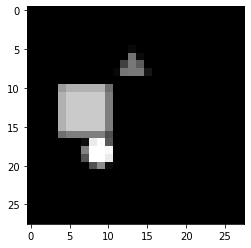

predicted:  5
actual:  3


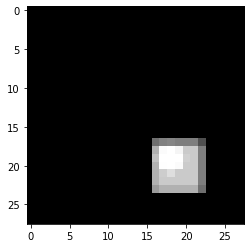

predicted:  1
actual:  4


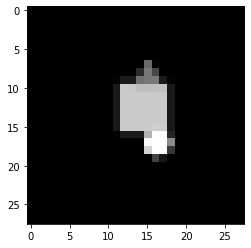

predicted:  6
actual:  5


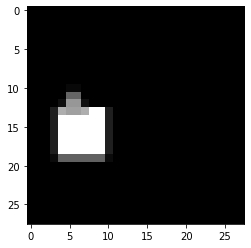

predicted:  4
actual:  2


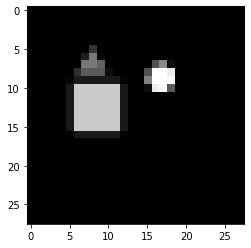

predicted:  5
actual:  3


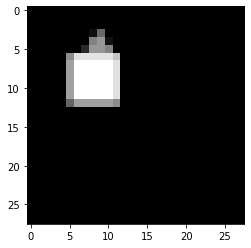

predicted:  6
actual:  4


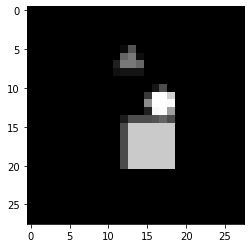

predicted:  5
actual:  3


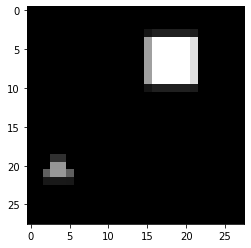

predicted:  5
actual:  2


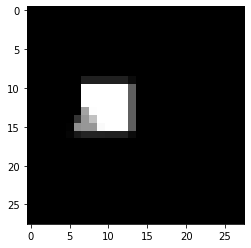

predicted:  1
actual:  2


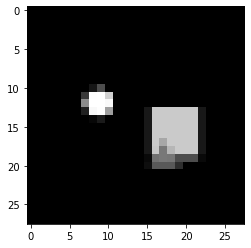

predicted:  2
actual:  3


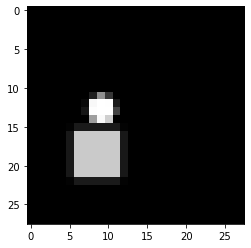

predicted:  5
actual:  2


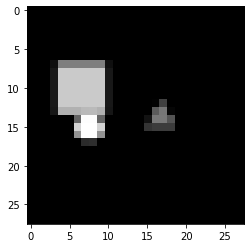

predicted:  5
actual:  3


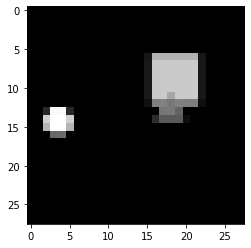

predicted:  2
actual:  3


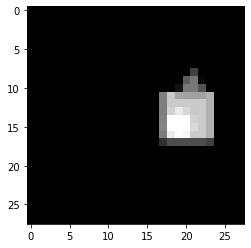

predicted:  4
actual:  6


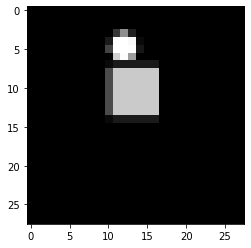

predicted:  5
actual:  2


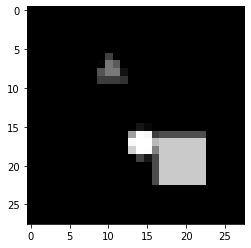

predicted:  2
actual:  3


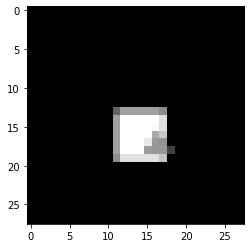

predicted:  1
actual:  2


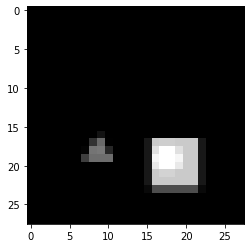

predicted:  2
actual:  5


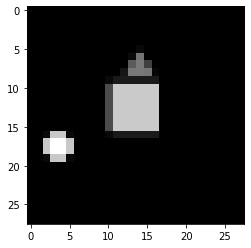

predicted:  5
actual:  3


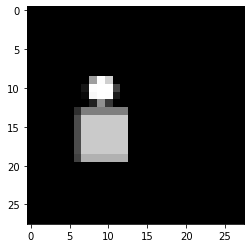

predicted:  5
actual:  2


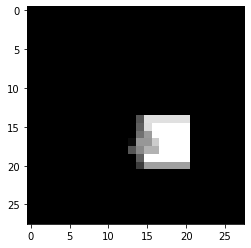

predicted:  1
actual:  2


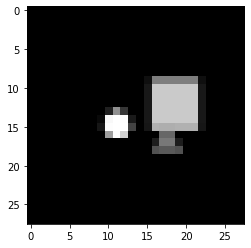

predicted:  2
actual:  3


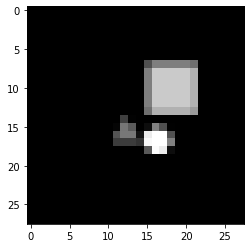

predicted:  2
actual:  3


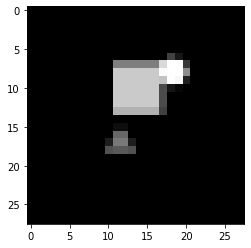

predicted:  2
actual:  3


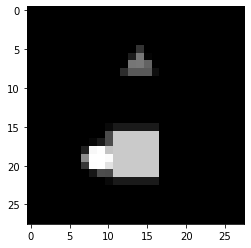

predicted:  2
actual:  3


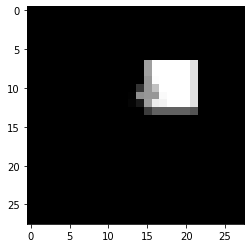

predicted:  1
actual:  2


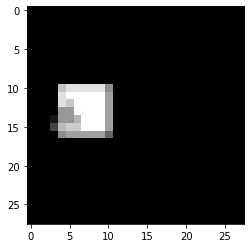

predicted:  1
actual:  2


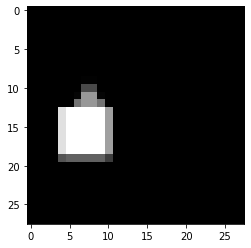

predicted:  6
actual:  4


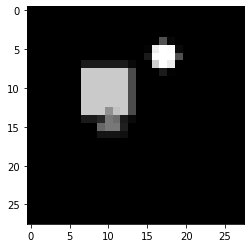

predicted:  2
actual:  3


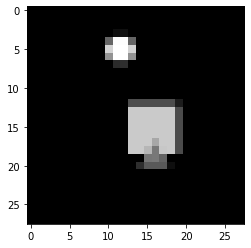

predicted:  2
actual:  3


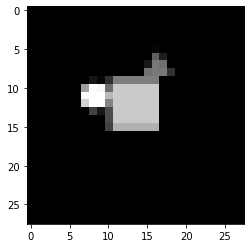

predicted:  5
actual:  3


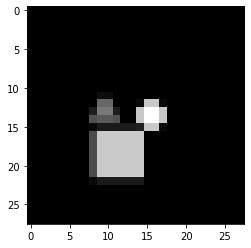

predicted:  5
actual:  3


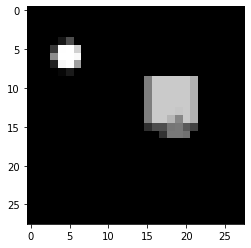

predicted:  2
actual:  3


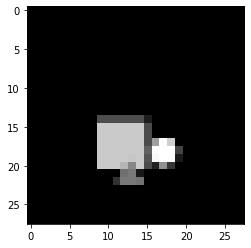

predicted:  2
actual:  3


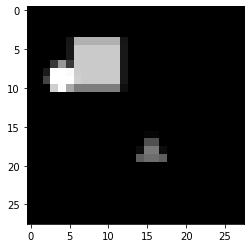

predicted:  2
actual:  3


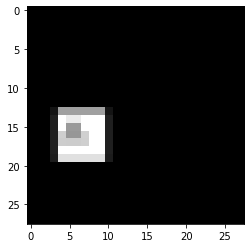

predicted:  1
actual:  2


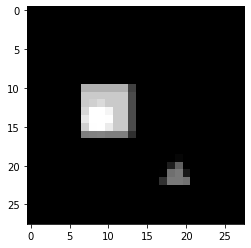

predicted:  2
actual:  5


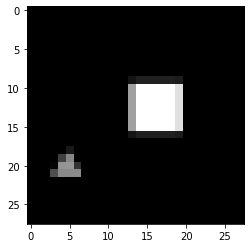

predicted:  5
actual:  2
101
0.031761006289308176


In [113]:
from numpy import argmax
x = 0
wrong = 0
test_x1 = x_test.reshape(x_test.shape[0], img_rows, img_cols)
#hot_pred = to_categorical(pred, 6)
for i in pred:
    if pred[x] != argmax(y_test[x]):
        wrong+=1
        plt.imshow(test_x1[x], cmap='gray')
        plt.show()
        print("predicted: ",pred[x]+1)
        print("actual: ", argmax(y_test[x])+1)
    x = x+1
print(wrong)
print(wrong/x)

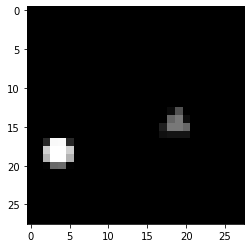

[0]
[0. 1. 0. 0. 0. 0.]


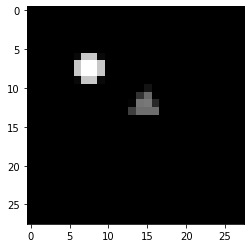

[0]
[0. 1. 0. 0. 0. 0.]


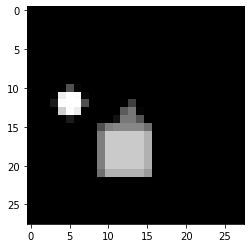

[0]
[0. 0. 0. 0. 1. 0.]


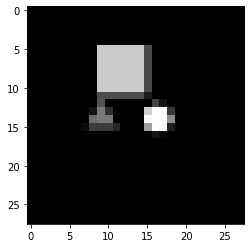

[0]
[0. 0. 1. 0. 0. 0.]


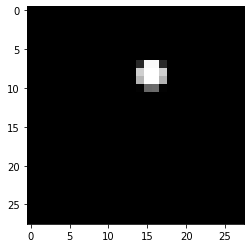

[0]
[1. 0. 0. 0. 0. 0.]


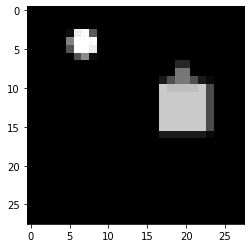

[0]
[0. 0. 0. 0. 1. 0.]


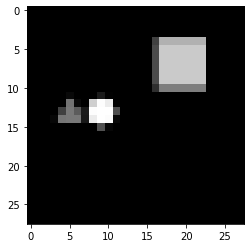

[0]
[0. 0. 1. 0. 0. 0.]


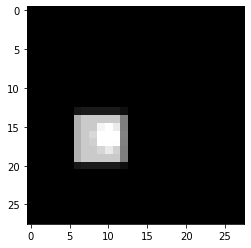

[0]
[0. 0. 0. 1. 0. 0.]


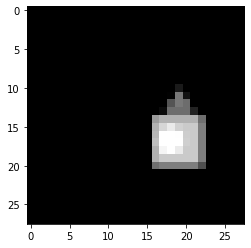

[0]
[0. 0. 0. 0. 0. 1.]


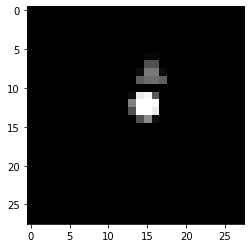

[0]
[0. 0. 0. 1. 0. 0.]


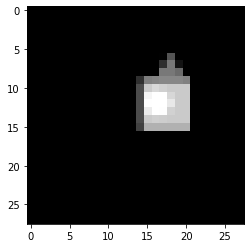

[0]
[0. 0. 0. 0. 0. 1.]


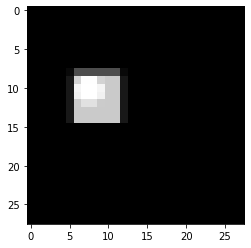

[0]
[0. 0. 0. 1. 0. 0.]


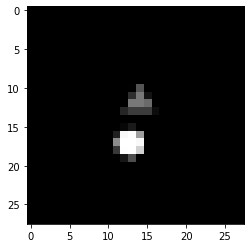

[0]
[0. 0. 0. 1. 0. 0.]


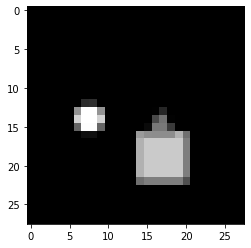

[0]
[0. 0. 0. 0. 1. 0.]


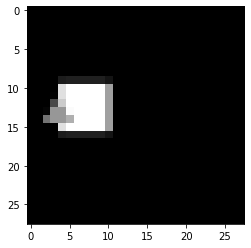

[0]
[0. 1. 0. 0. 0. 0.]


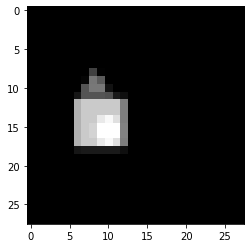

[0]
[0. 0. 0. 0. 0. 1.]


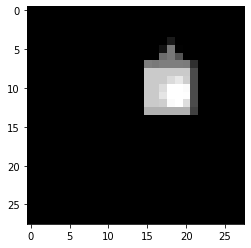

[0]
[0. 0. 0. 0. 0. 1.]


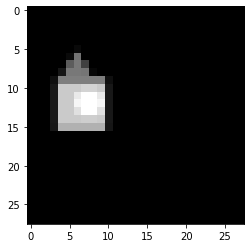

[0]
[0. 0. 0. 0. 0. 1.]


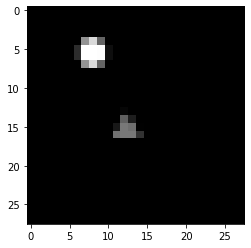

[0]
[0. 1. 0. 0. 0. 0.]


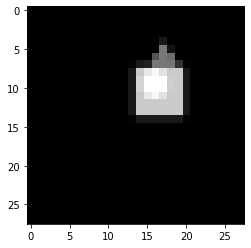

[0]
[0. 0. 0. 0. 0. 1.]


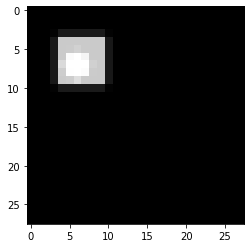

[0]
[0. 0. 0. 1. 0. 0.]


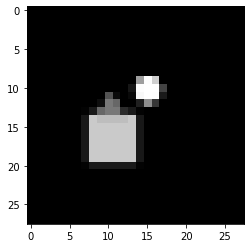

[0]
[0. 0. 0. 0. 1. 0.]


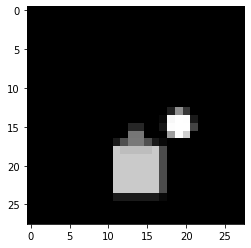

[0]
[0. 0. 0. 0. 1. 0.]


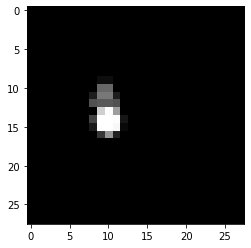

[0]
[0. 0. 0. 1. 0. 0.]


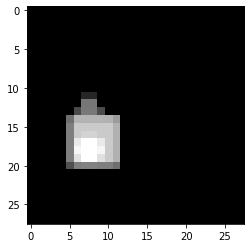

[0]
[0. 0. 0. 0. 0. 1.]


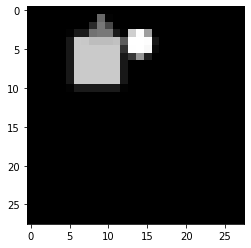

[0]
[0. 0. 0. 0. 1. 0.]


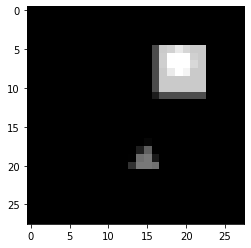

[0]
[0. 0. 0. 0. 1. 0.]


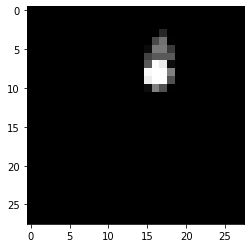

[0]
[0. 0. 0. 1. 0. 0.]


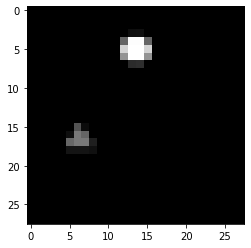

[0]
[0. 1. 0. 0. 0. 0.]


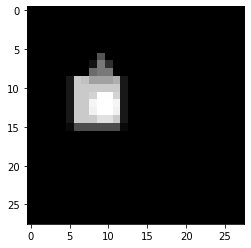

[0]
[0. 0. 0. 0. 0. 1.]


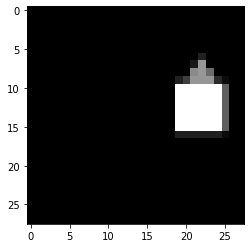

[0]
[0. 0. 0. 1. 0. 0.]


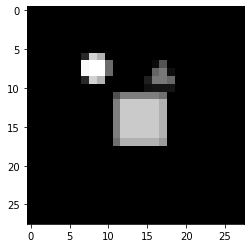

[0]
[0. 0. 1. 0. 0. 0.]


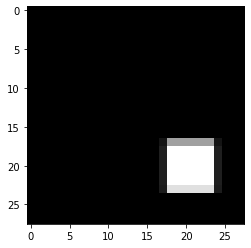

[0]
[1. 0. 0. 0. 0. 0.]


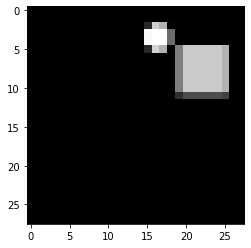

[0]
[0. 1. 0. 0. 0. 0.]


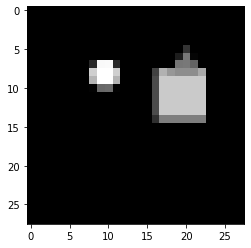

[0]
[0. 0. 0. 0. 1. 0.]


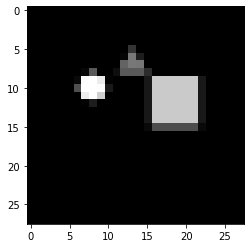

[0]
[0. 0. 1. 0. 0. 0.]


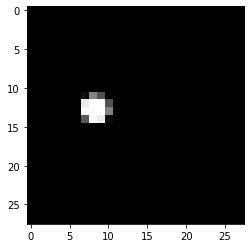

[0]
[1. 0. 0. 0. 0. 0.]


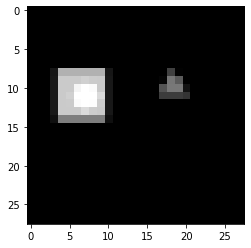

[0]
[0. 0. 0. 0. 1. 0.]


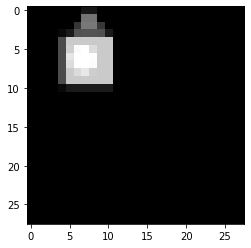

[0]
[0. 0. 0. 0. 0. 1.]


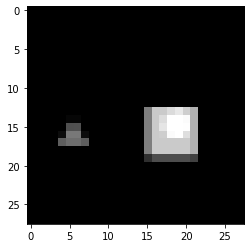

[0]
[0. 0. 0. 0. 1. 0.]


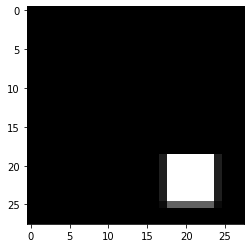

[0]
[1. 0. 0. 0. 0. 0.]


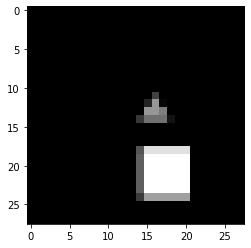

[0]
[0. 1. 0. 0. 0. 0.]


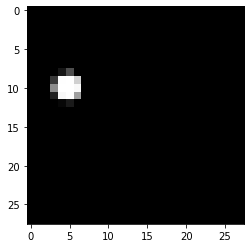

[0]
[1. 0. 0. 0. 0. 0.]


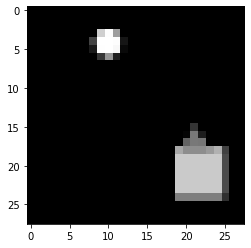

[0]
[0. 0. 0. 0. 1. 0.]


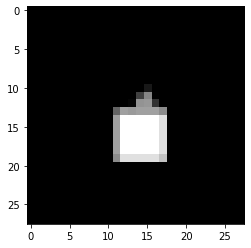

[0]
[0. 0. 0. 1. 0. 0.]


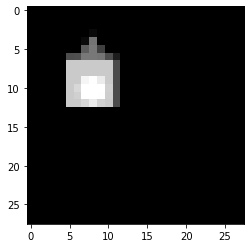

[0]
[0. 0. 0. 0. 0. 1.]


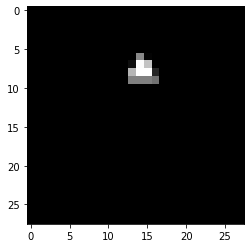

[0]
[1. 0. 0. 0. 0. 0.]


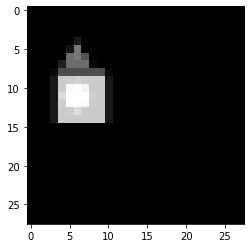

[0]
[0. 0. 0. 0. 0. 1.]


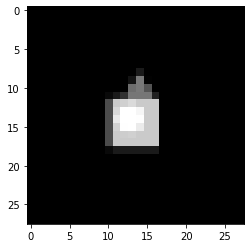

[0]
[0. 0. 0. 0. 0. 1.]


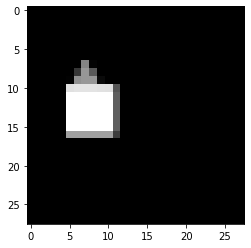

[0]
[0. 0. 0. 1. 0. 0.]


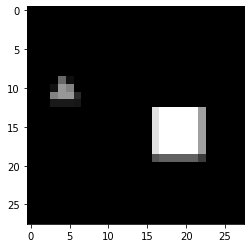

[0]
[0. 1. 0. 0. 0. 0.]


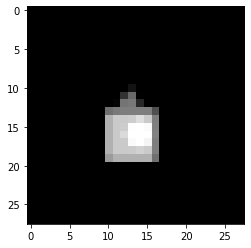

[0]
[0. 0. 0. 0. 0. 1.]


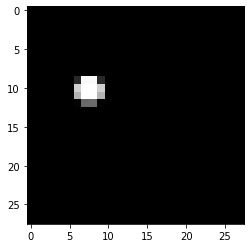

[0]
[1. 0. 0. 0. 0. 0.]


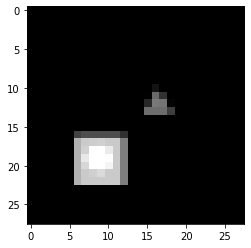

[0]
[0. 0. 0. 0. 1. 0.]


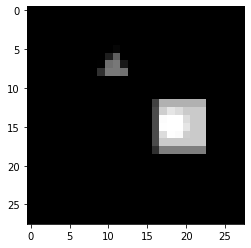

[0]
[0. 0. 0. 0. 1. 0.]


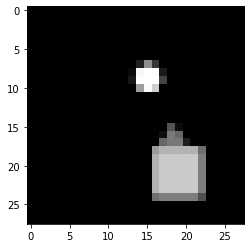

[0]
[0. 0. 0. 0. 1. 0.]


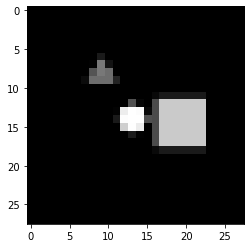

[0]
[0. 0. 1. 0. 0. 0.]


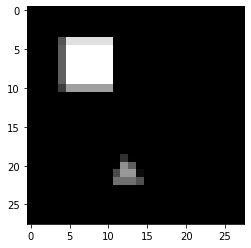

[0]
[0. 1. 0. 0. 0. 0.]


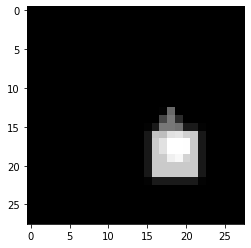

[0]
[0. 0. 0. 0. 0. 1.]


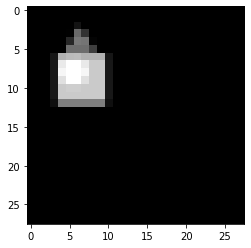

[0]
[0. 0. 0. 0. 0. 1.]


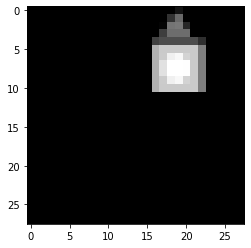

[0]
[0. 0. 0. 0. 0. 1.]


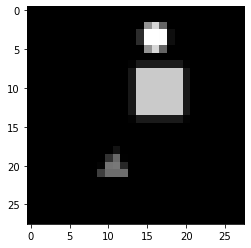

[0]
[0. 0. 1. 0. 0. 0.]


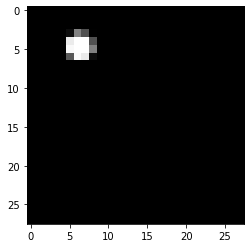

[0]
[1. 0. 0. 0. 0. 0.]


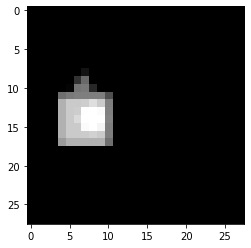

[0]
[0. 0. 0. 0. 0. 1.]


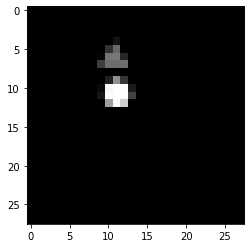

[0]
[0. 0. 0. 1. 0. 0.]


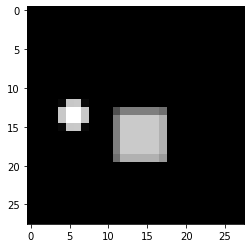

[0]
[0. 1. 0. 0. 0. 0.]


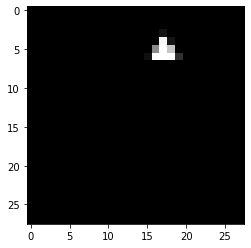

[0]
[1. 0. 0. 0. 0. 0.]


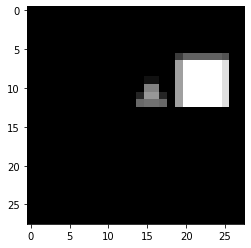

[0]
[0. 1. 0. 0. 0. 0.]


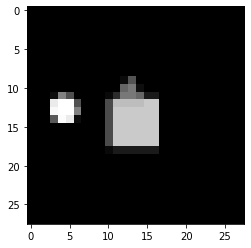

[0]
[0. 0. 0. 0. 1. 0.]


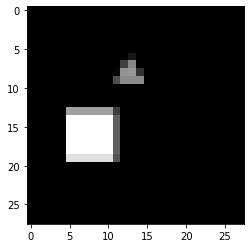

[0]
[0. 1. 0. 0. 0. 0.]


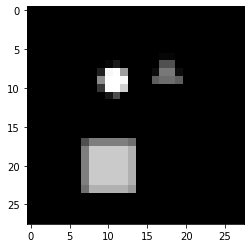

[0]
[0. 0. 1. 0. 0. 0.]


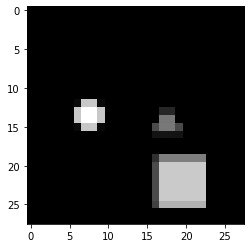

[0]
[0. 0. 1. 0. 0. 0.]


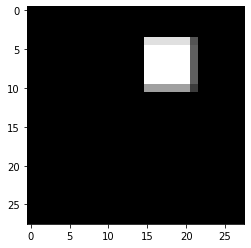

[0]
[1. 0. 0. 0. 0. 0.]


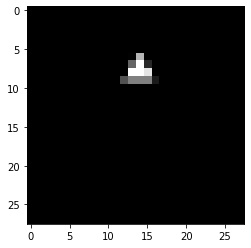

[0]
[1. 0. 0. 0. 0. 0.]


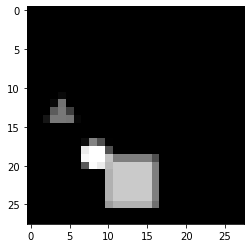

[0]
[0. 0. 1. 0. 0. 0.]


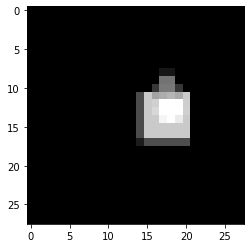

[0]
[0. 0. 0. 0. 0. 1.]


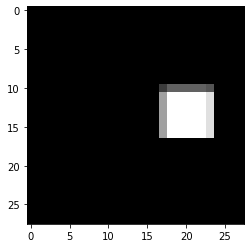

[0]
[1. 0. 0. 0. 0. 0.]


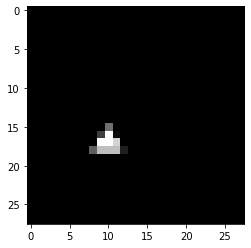

[0]
[1. 0. 0. 0. 0. 0.]


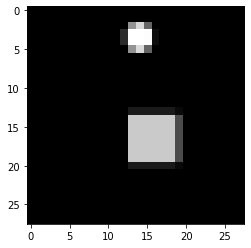

[0]
[0. 1. 0. 0. 0. 0.]


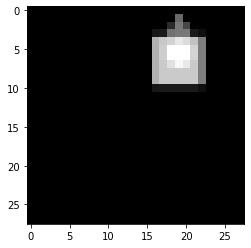

[0]
[0. 0. 0. 0. 0. 1.]


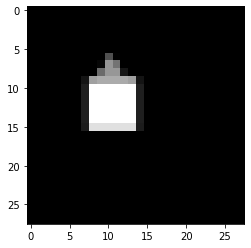

[0]
[0. 0. 0. 1. 0. 0.]


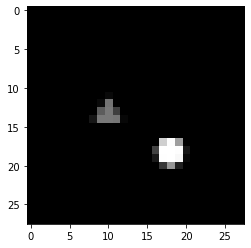

[0]
[0. 1. 0. 0. 0. 0.]


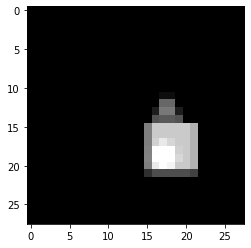

[0]
[0. 0. 0. 0. 0. 1.]


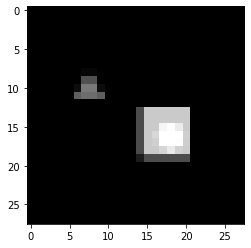

[0]
[0. 0. 0. 0. 1. 0.]


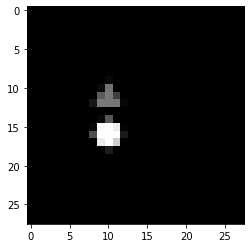

[0]
[0. 0. 0. 1. 0. 0.]


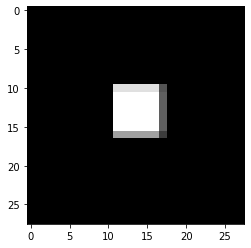

[0]
[1. 0. 0. 0. 0. 0.]


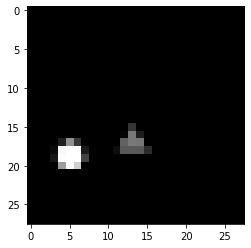

[0]
[0. 1. 0. 0. 0. 0.]


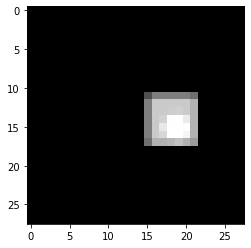

[0]
[0. 0. 0. 1. 0. 0.]


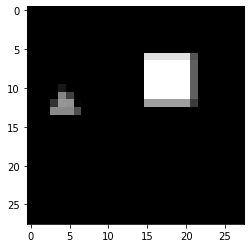

[0]
[0. 1. 0. 0. 0. 0.]


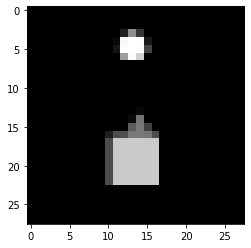

[0]
[0. 0. 0. 0. 1. 0.]


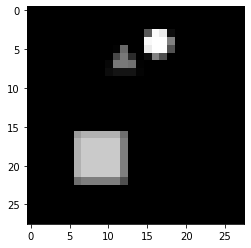

[0]
[0. 0. 1. 0. 0. 0.]


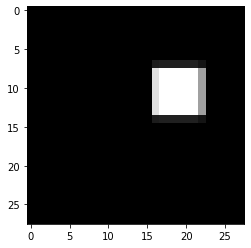

[0]
[1. 0. 0. 0. 0. 0.]


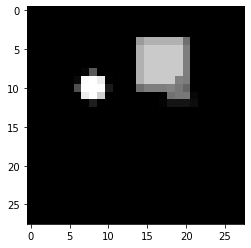

[0]
[0. 0. 1. 0. 0. 0.]


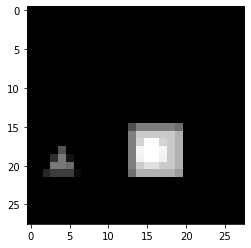

[0]
[0. 0. 0. 0. 1. 0.]


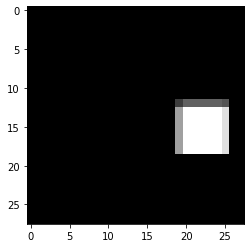

[0]
[1. 0. 0. 0. 0. 0.]


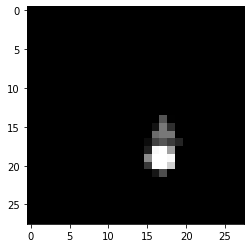

[0]
[0. 0. 0. 1. 0. 0.]


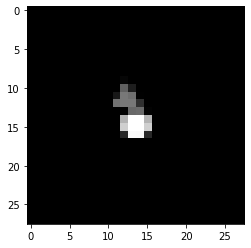

[0]
[0. 0. 0. 1. 0. 0.]


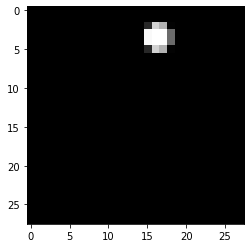

[0]
[1. 0. 0. 0. 0. 0.]


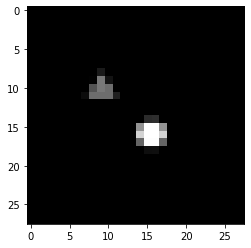

[0]
[0. 1. 0. 0. 0. 0.]


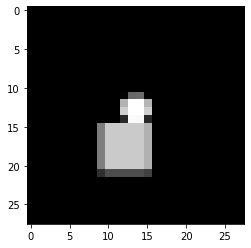

[0]
[0. 1. 0. 0. 0. 0.]


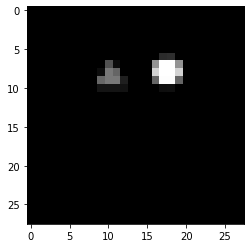

[0]
[0. 1. 0. 0. 0. 0.]


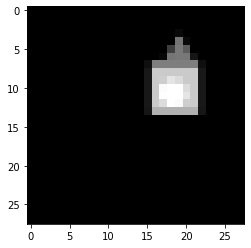

[0]
[0. 0. 0. 0. 0. 1.]


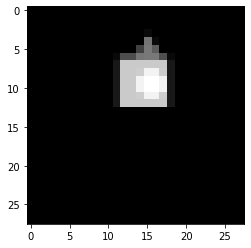

[0]
[0. 0. 0. 0. 0. 1.]


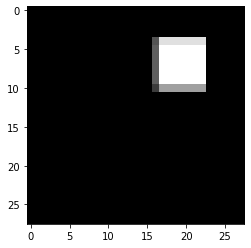

[0]
[1. 0. 0. 0. 0. 0.]


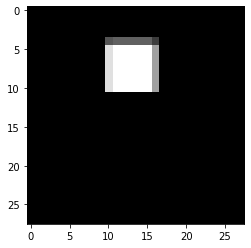

[0]
[1. 0. 0. 0. 0. 0.]


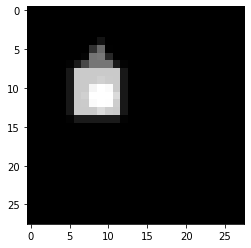

[0]
[0. 0. 0. 0. 0. 1.]


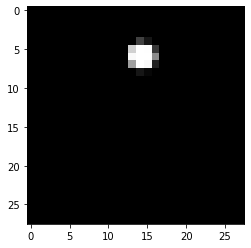

[0]
[1. 0. 0. 0. 0. 0.]


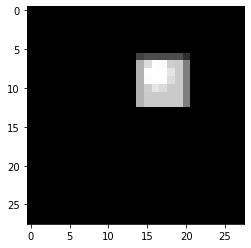

[0]
[0. 0. 0. 1. 0. 0.]


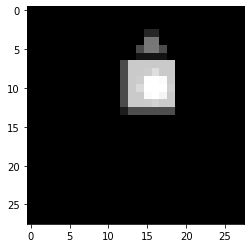

[0]
[0. 0. 0. 0. 0. 1.]


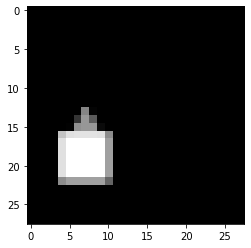

[0]
[0. 0. 0. 1. 0. 0.]


KeyboardInterrupt: 

In [66]:
def load_image(img_tensor, show=False):
    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=2)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

test_x1 = x_test.reshape(x_test.shape[0], img_rows, img_cols)

for i in y_test:
    x+=1
    test = x
    pred_test = test_x1[test]


    plt.imshow(pred_test, cmap='gray')
    plt.show()

    new_image = load_image(pred_test)


    pred1 = model.predict_classes(np.array( [new_image,] ))

    print(pred1)
    print(y_test[test])


In [ ]:
x_test.shape